# Energi Data

The energy data for this project has been collected by using the API from [Energidataservice.dk](https://www.energidataservice.dk/). The exact dataset in question can be found [here](https://www.energidataservice.dk/tso-electricity/ProductionConsumptionSettlement) or downloaded from the github repository [here](https://github.com/madsh0402/Forecasting-energy-consumption-in-Denmark/tree/master/Data/Energy).

In [18]:
import pandas as pd
# Indlæsning af data
Data = pd.read_csv("C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Speciale/Data/Data fra energidataservice.dk/Production and Consumption - Settlement.csv")

# Konverter 'HourDK' til datetime format og sæt som index
Data['HourDK'] = pd.to_datetime(Data['HourDK'])
Data.set_index('HourDK', inplace=True)

Data.tail()

,HourUTC,PriceArea,CentralPowerMWh,LocalPowerMWh,CommercialPowerMWh,LocalPowerSelfConMWh,OffshoreWindLt100MW_MWh,OffshoreWindGe100MW_MWh,OnshoreWindLt50kW_MWh,OnshoreWindGe50kW_MWh,...,ExchangeNO_MWh,ExchangeSE_MWh,ExchangeGE_MWh,ExchangeNL_MWh,ExchangeGreatBelt_MWh,GrossConsumptionMWh,GridLossTransmissionMWh,GridLossInterconnectorsMWh,GridLossDistributionMWh,PowerToHeatMWh
HourDK,,,,,,,,,,,,,,,,,,,,,
2023-04-10 02:00:00,2023-04-10T00:00:00,DK2,542.716430,56.011137,195.179447,4.254726,4.103300,125.771092,0.091373,122.521582,...,NaN,1218.86,-923.75,NaN,-199.1,1148.563281,28.741000,13.879016,55.044378,7.319560
2023-04-10 01:00:00,2023-04-09T23:00:00,DK1,295.084760,174.085155,67.325744,11.743112,110.835594,607.133481,3.237114,855.111878,...,828.20,718.94,-1641.44,-464.64,158.6,1726.785529,66.019140,28.708100,73.265991,9.637616
2023-04-10 01:00:00,2023-04-09T23:00:00,DK2,523.548447,56.455218,192.695424,4.105949,5.253700,126.193216,0.078260,121.382998,...,NaN,1252.83,-945.39,NaN,-160.8,1179.818996,29.380099,13.627976,55.872573,6.537930
2023-04-10 00:00:00,2023-04-09T22:00:00,DK1,365.348642,184.294252,67.073400,12.139897,108.930271,580.453773,2.587651,872.101825,...,1313.43,682.06,-2128.03,-450.36,150.0,1762.614751,77.556467,26.627500,74.698764,9.421748
2023-04-10 00:00:00,2023-04-09T22:00:00,DK2,577.949918,59.068309,193.441627,4.415682,5.439600,114.727084,0.072489,116.494591,...,NaN,1221.67,-945.16,NaN,-152.3,1200.284632,29.300249,13.956008,56.731284,2.712530


Here you can see the last 5 observations of the dataset, which contains 319726 observations. However, there are 2 observations for each time point because there is one observation for each electricity network (DK1 and DK2). These can now be summed to get the consumption for all of Denmark for every hour from 2005-03-25 23:00:00 to 2023-04-10 00:00:00, and cut off all other variables except `HourDK` and `GrossConsumptionMWh`.

In [35]:
# Reset index
Data.reset_index(inplace=True)

# Select only the necessary columns
Energy_Data = Data[['HourDK', 'PriceArea', 'GrossConsumptionMWh']]

# Convert 'HourDK' to datetime format and set it as index
Energy_Data['HourDK'] = pd.to_datetime(Energy_Data['HourDK'])
Energy_Data.set_index('HourDK', inplace=True)

# Group by 'HourDK' and sum 'GrossConsumptionMWh' for each hour
Energy_Data = Energy_Data.groupby('HourDK')['GrossConsumptionMWh'].sum().reset_index()

Energy_Data

C:\Users\madsh\AppData\Local\Temp\ipykernel_9972\2933537269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energy_Data['HourDK'] = pd.to_datetime(Energy_Data['HourDK'])


,HourDK,GrossConsumptionMWh
0,2005-01-01 00:00:00,3370.256592
1,2005-01-01 01:00:00,3237.832763
2,2005-01-01 02:00:00,3101.580811
3,2005-01-01 03:00:00,2963.392211
4,2005-01-01 04:00:00,2854.805420
...,...,...
159840,2023-05-30 19:00:00,3935.964505
159841,2023-05-30 20:00:00,3764.163099
159842,2023-05-30 21:00:00,3655.639568
159843,2023-05-30 22:00:00,3663.715933


We can now take a closer look at the energy data by plotting it:

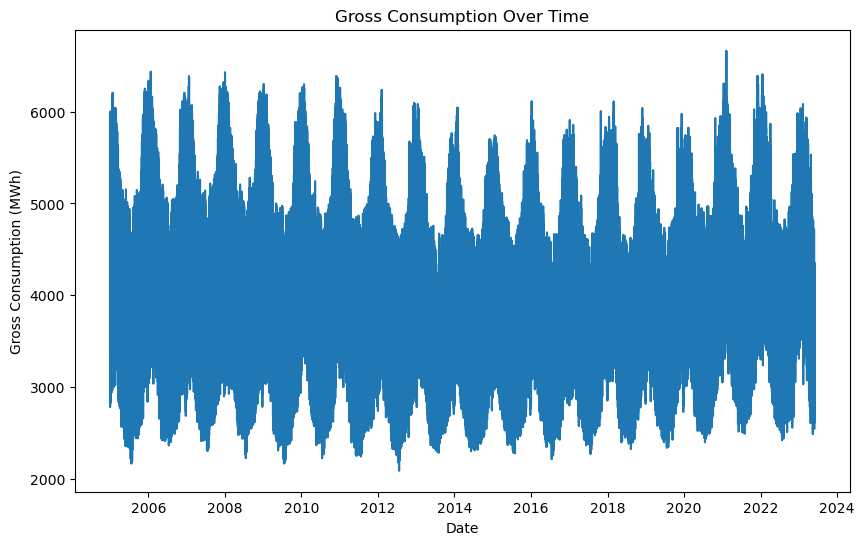

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10,6))
plt.plot(Energy_Data['HourDK'], Energy_Data['GrossConsumptionMWh'])
plt.title('Gross Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Consumption (MWh)')
plt.show()

It may be difficult to see anything beyond the fact that there is an annual season in the data where consumption rises in the winter and falls in the summer. Let's take a closer look at a year, a month, a week, and a day:

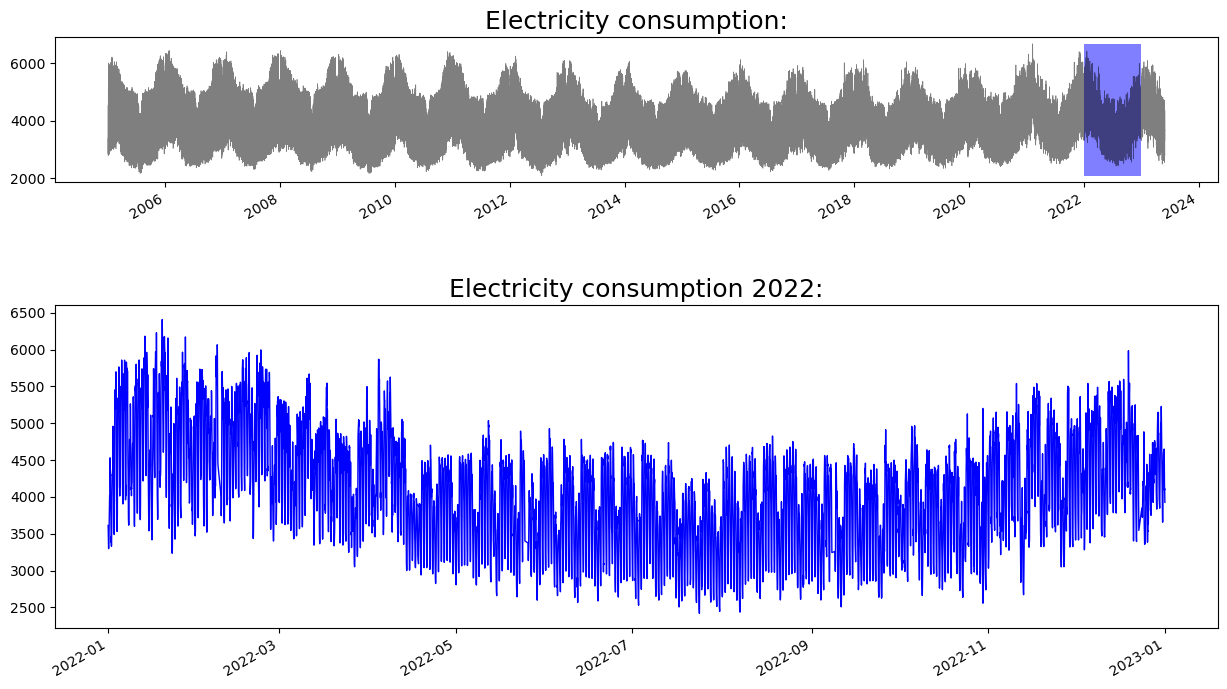

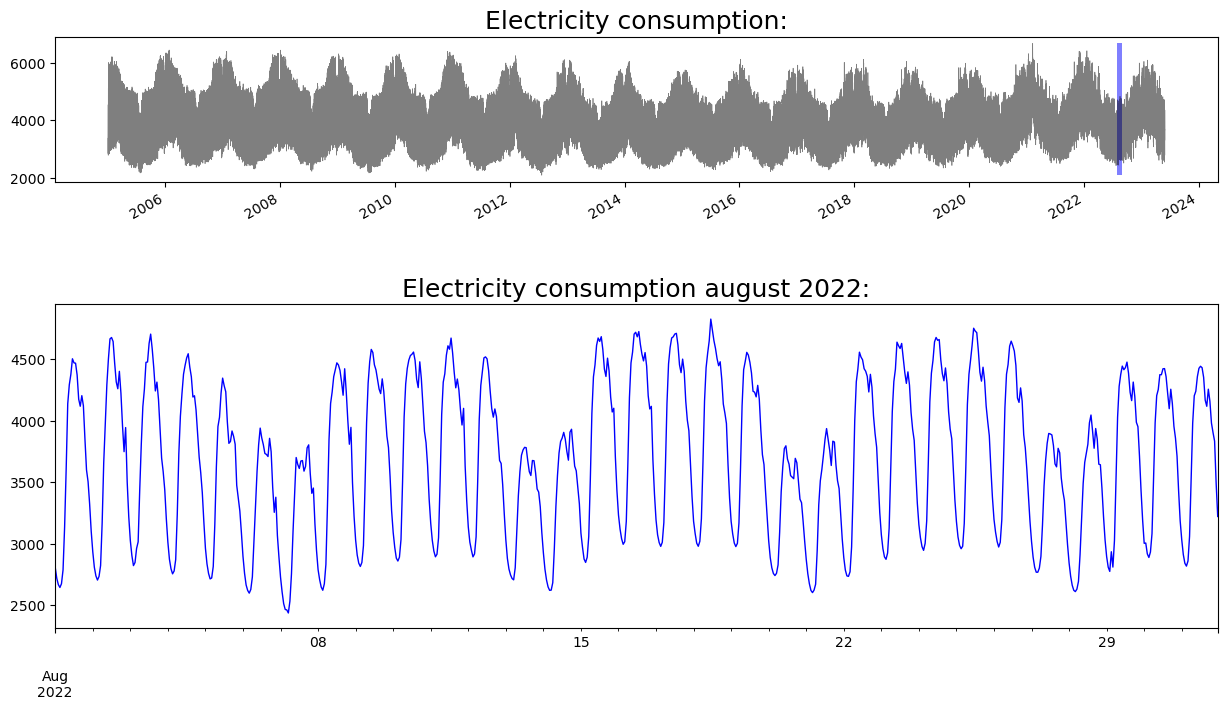

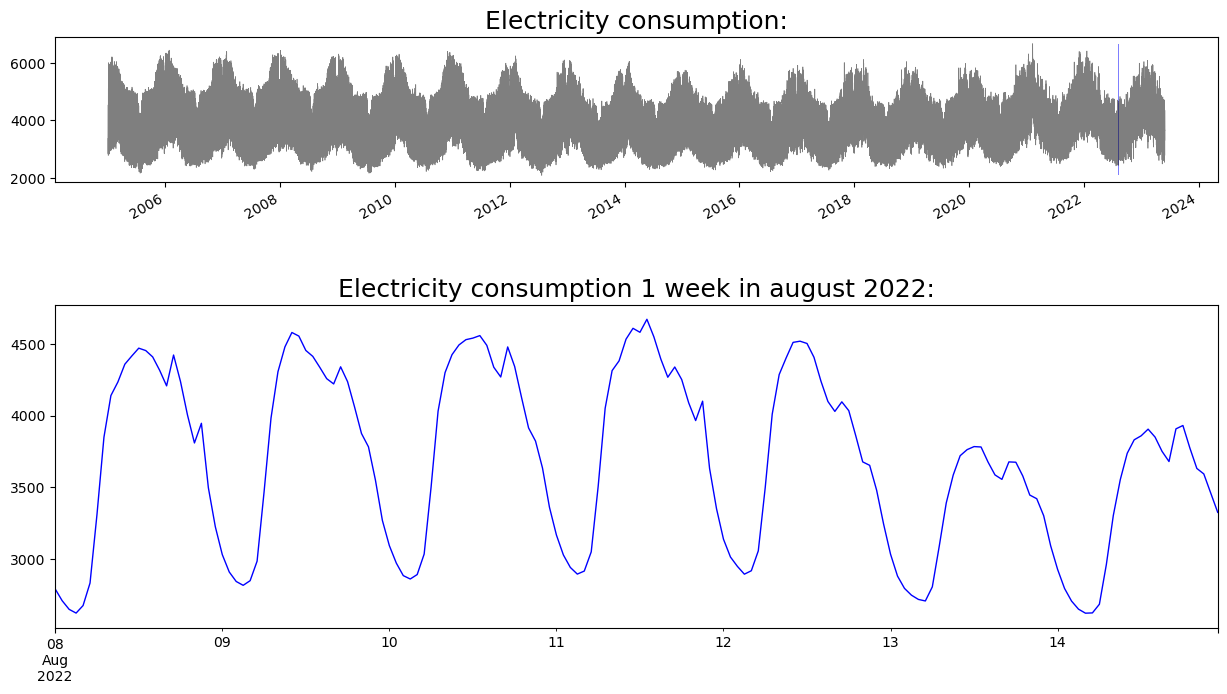

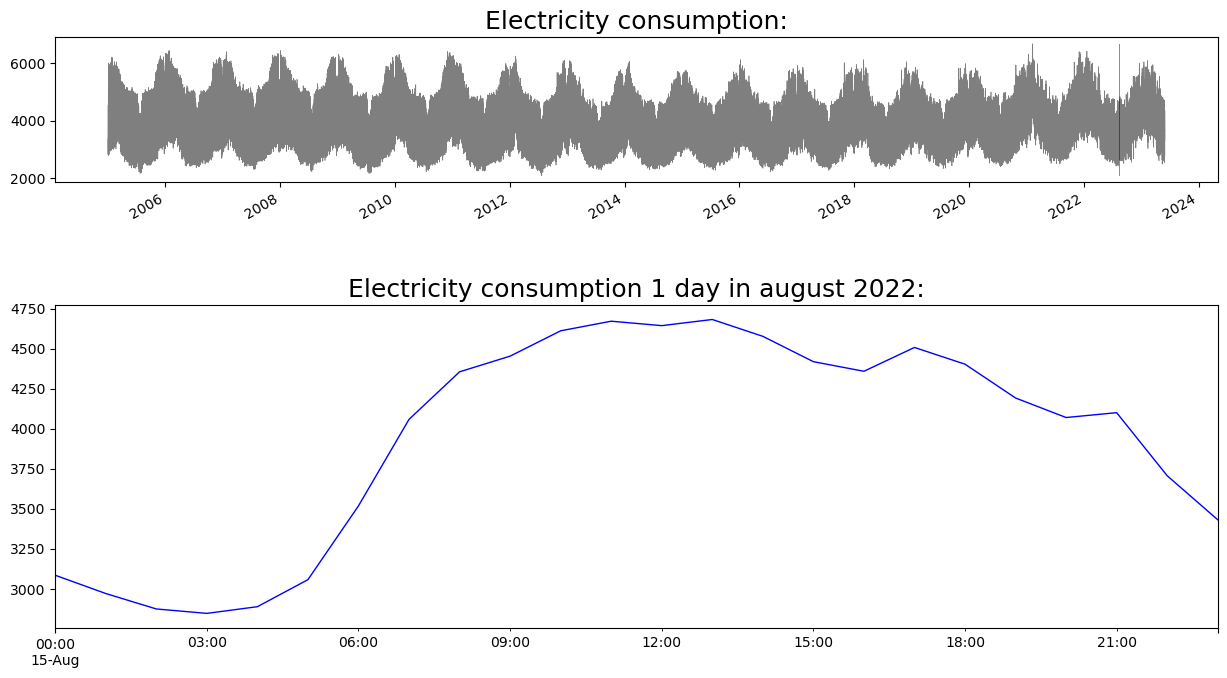

In [67]:
# Zooming time series chart
# ==============================================================================

zoom = ('2022-01-01 00:00:00','2022-12-31 23:00:00')
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[4:, :])
Energy_Data.GrossConsumptionMWh.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Energy_Data.GrossConsumptionMWh)
max_y = max(Energy_Data.GrossConsumptionMWh)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
Energy_Data.loc[zoom[0]: zoom[1]].GrossConsumptionMWh.plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Electricity consumption:', fontsize=18)
zoom_ax.set_title(f'Electricity consumption 2022:', fontsize=18)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)

zoom = ('2022-08-01 00:00:00','2022-08-31 23:00:00')
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[4:, :])
Energy_Data.GrossConsumptionMWh.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Energy_Data.GrossConsumptionMWh)
max_y = max(Energy_Data.GrossConsumptionMWh)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
Energy_Data.loc[zoom[0]: zoom[1]].GrossConsumptionMWh.plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Electricity consumption:', fontsize=18)
zoom_ax.set_title(f'Electricity consumption august 2022:', fontsize=18)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)

zoom = ('2022-08-08 00:00:00','2022-08-14 23:00:00')
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[4:, :])
Energy_Data.GrossConsumptionMWh.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Energy_Data.GrossConsumptionMWh)
max_y = max(Energy_Data.GrossConsumptionMWh)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
Energy_Data.loc[zoom[0]: zoom[1]].GrossConsumptionMWh.plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Electricity consumption:', fontsize=18)
zoom_ax.set_title(f'Electricity consumption 1 week in august 2022:', fontsize=18)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)

zoom = ('2022-08-15 00:00:00','2022-08-15 23:00:00')
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[4:, :])
Energy_Data.GrossConsumptionMWh.plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(Energy_Data.GrossConsumptionMWh)
max_y = max(Energy_Data.GrossConsumptionMWh)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
Energy_Data.loc[zoom[0]: zoom[1]].GrossConsumptionMWh.plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Electricity consumption:', fontsize=18)
zoom_ax.set_title(f'Electricity consumption 1 day in august 2022:', fontsize=18)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)